去重前的数据量: 20358
去重后的数据量: 19779
actor_id                   0
label                      0
login                      0
id                         0
node_id                    0
avatar_url                 0
url                        0
html_url                   0
followers_url              0
following_url              0
gists_url                  0
starred_url                0
subscriptions_url          0
organizations_url          0
repos_url                  0
events_url                 0
received_events_url        0
type                       0
site_admin                 0
name                    2589
company                 8982
blog                   11263
location                7080
email                  11739
hireable               16481
bio                    10930
twitter_username       14859
public_repos               0
public_gists               0
followers                  0
following                  0
created_at                 0
updated_at                 0
dtype: int64


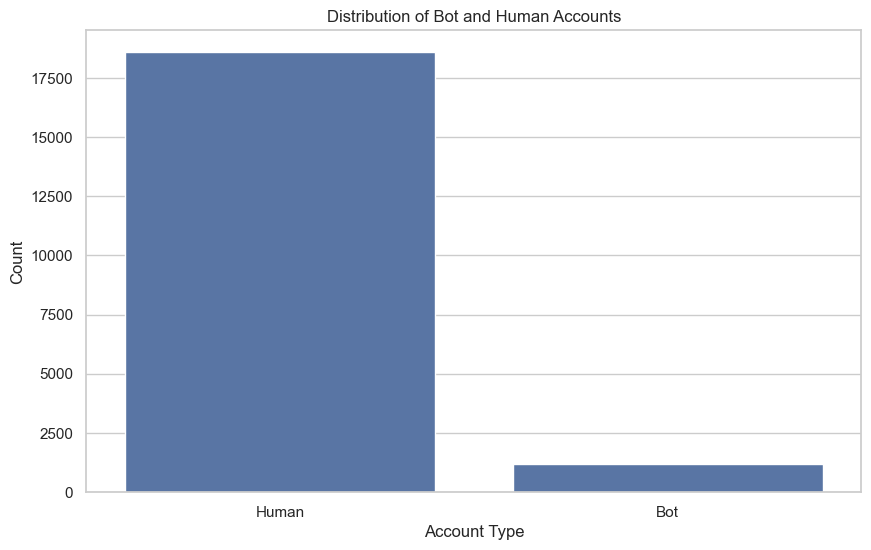

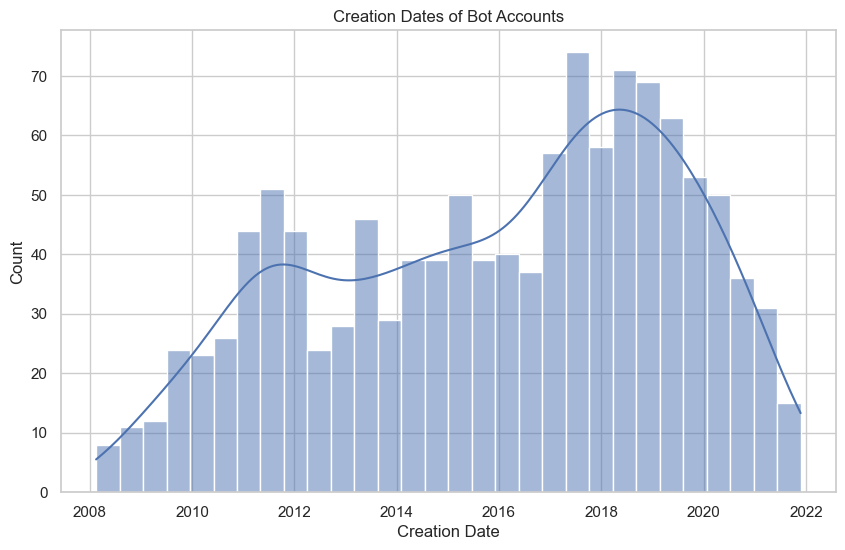

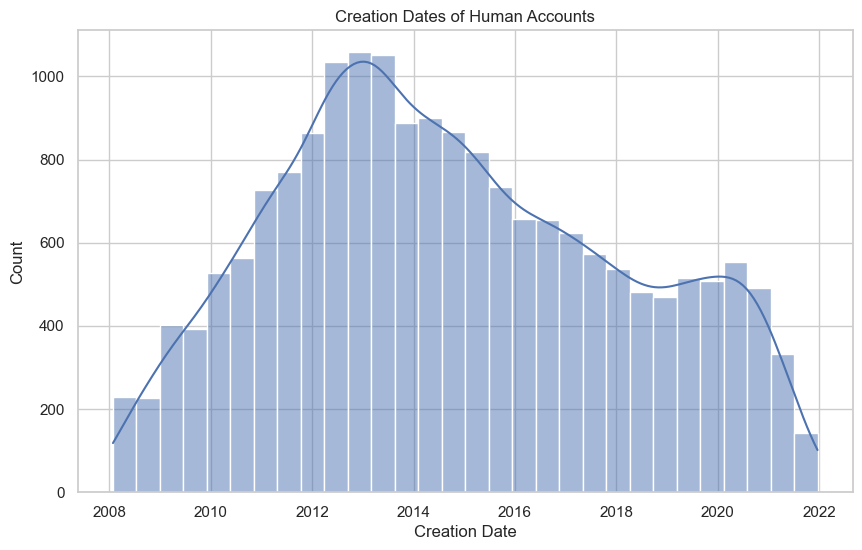

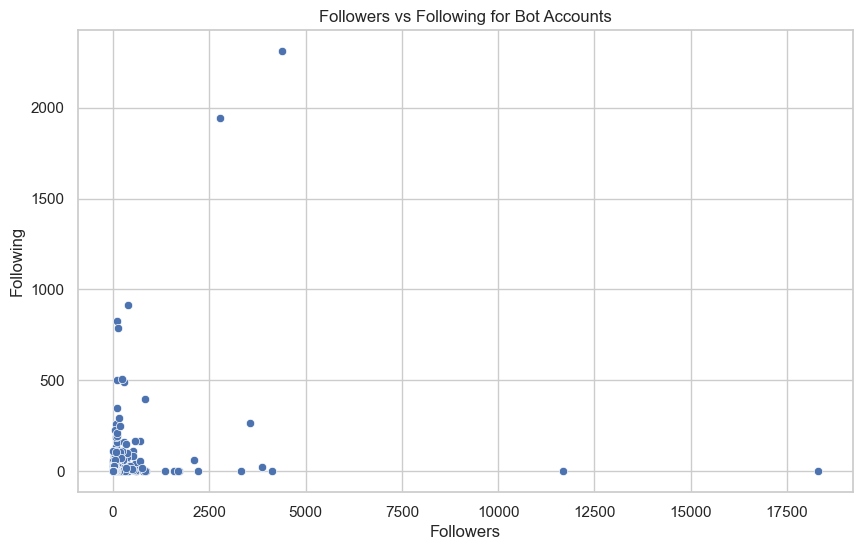

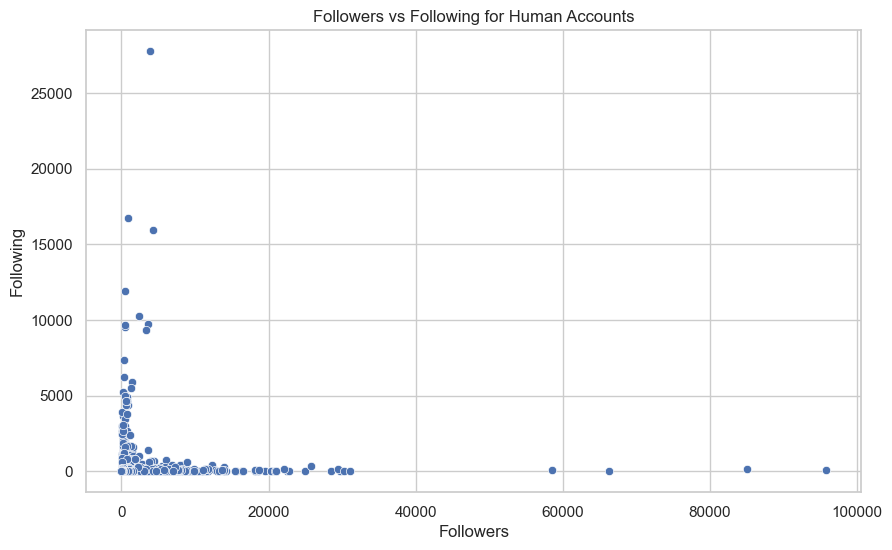

In [1]:
import pandas as pd

# 读取数据集
data = pd.read_csv('github_bot_raw_data.csv')

# 输出去重前的数据量
print(f"去重前的数据量: {data.shape[0]}")

# 删除重复数据
data = data.drop_duplicates()

# 输出去重后的数据量
print(f"去重后的数据量: {data.shape[0]}")

# 去掉 gravatar_id 列
data = data.drop(columns=['gravatar_id'])

# 查看各列的缺失值情况
print(data.isnull().sum())

# 将可转化成 boolean 变量的列字段转化成 boolean 变量
bool_columns = ['site_admin', 'company', 'blog', 'location', 'hireable']
for col in bool_columns:
    data[col] = data[col].notnull()

# 文本数据用空字符串填充空值
text_columns = ['bio']
for col in text_columns:
    data[col] = data[col].fillna('')

# 再次查看各列的缺失值情况
print(data.isnull().sum())

# 将 created_at、updated_at 转为时间戳
data['created_at'] = pd.to_datetime(data['created_at'])
data['updated_at'] = pd.to_datetime(data['updated_at'])

# 查看转换后的数据类型
print(data.dtypes[['created_at', 'updated_at']])

import matplotlib.pyplot as plt
import seaborn as sns

# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 4.1 可视化 bot 和 human 类型的情况
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=data)
plt.title('Distribution of Bot and Human Accounts')
plt.xlabel('Account Type')
plt.ylabel('Count')
plt.show()

# 4.2 可视化 bot 类型账号的 created_at 情况
plt.figure(figsize=(10, 6))
sns.histplot(data[data['label'] == 'Bot']['created_at'], bins=30, kde=True)
plt.title('Creation Dates of Bot Accounts')
plt.xlabel('Creation Date')
plt.ylabel('Count')
plt.show()

# 4.3 可视化 human 类型账号的 created_at 情况
plt.figure(figsize=(10, 6))
sns.histplot(data[data['label'] == 'Human']['created_at'], bins=30, kde=True)
plt.title('Creation Dates of Human Accounts')
plt.xlabel('Creation Date')
plt.ylabel('Count')
plt.show()

# 4.4 可视化 bot 类型账号的 followers 和 following 情况
plt.figure(figsize=(10, 6))
sns.scatterplot(x='followers', y='following', data=data[data['label'] == 'Bot'])
plt.title('Followers vs Following for Bot Accounts')
plt.xlabel('Followers')
plt.ylabel('Following')
plt.show()

# 4.5 可视化 human 类型账号的 followers 和 following 情况
plt.figure(figsize=(10, 6))
sns.scatterplot(x='followers', y='following', data=data[data['label'] == 'Human'])
plt.title('Followers vs Following for Human Accounts')
plt.xlabel('Followers')
plt.ylabel('Following')
plt.show()